# Ensemble Learning

---
### Qu'est ce que c'est ?

"Ensemble Learning" est un ensemble de techniques en machine learning qui combine plusieurs modèles pour en produire un seul, plus précis.

Cette combinaison peut être faite de 3 manières :

- "Bagging" : entraîne plusieurs modèles indépendamment et retourne la moyenne des prédictions

- "Boosting" : entraîne plusieurs modèles successivement, où chaque modèle traite les erreurs du précédent avec plus d'importance

- "Stacking" : entraîne plusieurs modèles de types différents, puis utilise un ultime modèle pour utiliser la donnée générée par les précédents modèles


## 0. Préparation de donnée et benchmark

In [69]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, Y = load_wine(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [70]:
from sklearn.tree import DecisionTreeClassifier

scores = []

for j in range(10):
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    scores.append(round(tree.score(X_test, Y_test), 2))

print(scores)

[0.82, 0.84, 0.82, 0.8, 0.82, 0.84, 0.84, 0.82, 0.84, 0.82]




#### IMPORTANT

On voit juste au dessus les scores de différents arbres de décision pour comparer ensuite nos méthods suivantes.

 

## 1. Bagging : Random Forest et BaggingClassifier

 

#### Random Forest

 

L'algorithme de Random Forest est un cas particulier de bagging, très populaire car il permet de minimiser les défauts de l'arbre de décision, notamment l'over-fitting et propose d'excellentes performances. C'est un regroupement de decision trees, que l'on avait vu (et implémenté !) dans un précédent post.

<div>
<img src="bagging.png" width="500"/>
</div>

In [71]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
random_forest_score = round(random_forest.score(X_test, Y_test), 2)

print(f"Random Forest score on test set : {random_forest_score}")

Random Forest score on test set : 0.98


#### BaggingClassifier

 

Le modèle pour le bagging dans sk-learn est BaggingClassifier. On lui passe comme paramètre le modèle sous-jacent à utiliser, et la quantité de ces modèles que l'on veut générer et ensuite moyenner. Ici, je l'implémente avec comme modèle sous-jacent un arbre de décision, et autant de modèle sous-jacents que dans la random forest.


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

decision_tree_bagged = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
decision_tree_bagged.fit(X_train, Y_train)
bagged_score = round(decision_tree_bagged.score(X_test, Y_test), 2)

print(f"Bagged Decision Trees score on test set : {bagged_score}") 

Bagged Decision Trees score on test set : 0.93



## 1. Boosting : Gradient Boosting Classifier 

Pour booster, on utilise GradientBoostingClassifier. Cela génère des modèles du même types qui s'entraînent successivement en accordant plus d'importance aux erreurs du précédent modèle.
Cela permet d'augmenter notre score au fur et à mesure des entraînements successifs.

<div>
<img src="boosting.png" width="500"/>
</div>

In [73]:
from sklearn.ensemble import GradientBoostingClassifier 

boosted_classifier = GradientBoostingClassifier(n_estimators=10)
boosted_classifier.fit(X_train, Y_train)
boosted_score = round(boosted_classifier.score(X_test, Y_test), 2)

print(f"Boosted Classifier score on test set : {boosted_score}")

Boosted Classifier score on test set : 0.91


## 2. Stacking : Stacking Classifier

Le stacking se fait avec StackingClassifier. Il s'agît d'entraîner des modèles de types différents (alors que boosting et bagging étaient des modèles de type identique), qui génère leurs prédictions. Enfin, un meta-modèle aggrege toutes ces prédictions pour en faire une seule, celle de notre modèle final.

<div>
<img src="stacking.png" width="500"/>
</div>

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('k_neighbors',  KNeighborsClassifier()),

             ('decision_tree', DecisionTreeClassifier())] 


stack_model = StackingClassifier(estimators=estimators)
stack_model.fit(X_train, Y_train)
stack_score = round(stack_model.score(X_test, Y_test), 2)

print(f"Stacked Classifier score on test set : {stack_score}")

Stacked Classifier score on test set : 0.87


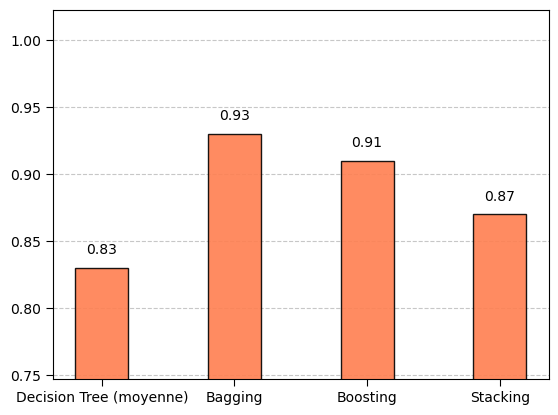

In [75]:
import matplotlib.pyplot as plt
import numpy as np

x = ["Decision Tree (moyenne)", "Bagging", "Boosting", "Stacking"]
y = [round(np.array(scores).mean(), 2), bagged_score, boosted_score, stack_score]

fig, ax = plt.subplots()
bars = ax.bar(x, y, width=0.4, color="coral", alpha=0.9, edgecolor='black', linewidth=1)

ax.bar_label(bars, padding=8)
ax.tick_params(axis='both', which='both', length=5)
ax.set_ylim(min(y) * 0.9, max(y) * 1.1)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)